<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Actividad 2 - Trabajando con redes neuronales y Deep Learning!</h1></center>

<b>Juan David Escobar Escobar.</b></br>
* Enero 2022.
* Grupo 14.

## EDA - Exploración de datos

### importar librerias e inicializar variables globales

In [340]:
!pip install pretty-confusion-matrix

In [341]:
!pip install requests

In [342]:
!pip install -q seaborn

In [343]:
!pip install ann_visualizer

In [344]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [345]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import pandas as pd

from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

import seaborn as sns
from seaborn import lmplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn import tree

import plotly.graph_objs as go
import plotly.offline as py

import pydotplus

import numpy as np

from scipy import stats

from mlxtend.plotting import plot_decision_regions

import os

In [346]:
import pathlib # es un componente permite manipular rutas de sistemas de archivos de forma rápida en cualquier sistema operativo.

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import requests
import io

import opendatasets as od

print(tf.__version__)

2.7.0


In [347]:
import warnings
warnings.filterwarnings('ignore')

### Cargar dataset en memoria

In [348]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=";")
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [349]:
df.shape

(4898, 12)

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [351]:
df_describe = df.describe().transpose()

df_describe['count'] = round(df_describe['count']).astype(str).str.replace('.', ',')
df_describe['mean'] =  round(df_describe['mean'], 2).astype(str).str.replace('.', ',')
df_describe['std'] = round(df_describe['std'], 2).astype(str).str.replace('.', ',')
df_describe['min'] = round(df_describe['min'], 2).astype(str).str.replace('.', ',')
df_describe['25%'] = round(df_describe['25%'], 2).astype(str).str.replace('.', ',')
df_describe['50%'] = round(df_describe['50%'], 2).astype(str).str.replace('.', ',')
df_describe['75%'] = round(df_describe['75%'], 2).astype(str).str.replace('.', ',')
df_describe['max'] = round(df_describe['max'], 2).astype(str).str.replace('.', ',')
df_describe

,count,mean,std,min,25%,50%,75%,max
fixed acidity,"4898,0","6,85","0,84","3,8","6,3","6,8","7,3","14,2"
volatile acidity,"4898,0","0,28","0,1","0,08","0,21","0,26","0,32","1,1"
citric acid,"4898,0","0,33","0,12","0,0","0,27","0,32","0,39","1,66"
residual sugar,"4898,0","6,39","5,07","0,6","1,7","5,2","9,9","65,8"
chlorides,"4898,0","0,05","0,02","0,01","0,04","0,04","0,05","0,35"
free sulfur dioxide,"4898,0","35,31","17,01","2,0","23,0","34,0","46,0","289,0"
total sulfur dioxide,"4898,0","138,36","42,5","9,0","108,0","134,0","167,0","440,0"
density,"4898,0","0,99","0,0","0,99","0,99","0,99","1,0","1,04"
pH,"4898,0","3,19","0,15","2,72","3,09","3,18","3,28","3,82"
sulphates,"4898,0","0,49","0,11","0,22","0,41","0,47","0,55","1,08"


### Fase exploratoria de los datos

In [352]:
# Validar valores unicos para atributo tipo salida (clase)

print(df['quality'].unique())

# Número de clases = [6 5 7 8 4 3 9] = 7

[6 5 7 8 4 3 9]


In [353]:
print(df.groupby('quality').size())

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64


Title. Distribución de datos en quality


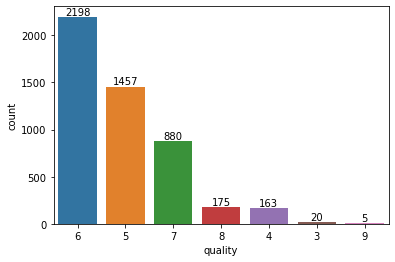

In [354]:
def graficar_histograma_clases(col_cualitativas, df):
    
    for col in col_cualitativas:
        
        print('Title. Distribución de datos en', col)
        ax = sns.countplot(x=df[col],
                   order=df[col].value_counts(ascending=False).index)
        abs_values = df[col].value_counts(ascending=False).values
        ax.bar_label(container=ax.containers[0], labels=abs_values)
        
graficar_histograma_clases(['quality'], df)

In [355]:
# Validar missing values en todo el df 

total_nulls = sum(df.isnull().sum())
total_isna = sum(df.isna().sum())

print("* total_null's", sum(df.isnull().sum()))
print('* total_isna', sum(df.isna().sum()))

* total_null's 0
* total_isna 0


In [356]:
# Eliminar registros que tienen missing values 

if total_nulls > 0:
    df = df.dropna()
    df.shape

In [357]:
# Eliminar registros duplicar

if total_isna > 0:
    df.drop_duplicates()
    df.shape

### Codificación de la salida (One hot Encoding)

In [358]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_regression

# quality (score between 0 and 10)
# quality > 6.5 => "good"
# quality < 6.5 => "bad"

X = df.drop(labels=['quality', ], axis=1)
Y = df['quality']


X_train, X_test, y_train, y_test = train_test_split(X,                                                   
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=0)

print(type(X), type(Y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


### Seleccion de variables + división de datos de entrenamiento y pruebas

In [359]:
names = pd.DataFrame(X_train.columns)
model = SelectKBest(score_func=f_regression, k=7)
# model = SelectKBest(score_func=f_regression,
#                     percentile = 10) # permite obtener el percentil=percent de variables más significativas.
results = model.fit(X_train, y_train)
results_df = pd.DataFrame(results.pvalues_)
print(results.scores_)

#Concat and name columns
scored = pd.concat([names, results_df], axis=1)
scored.columns = ["Feature", "P_Values"]
scored.sort_values(by=['P_Values']).head(12)

[4.46363844e+01 1.62854011e+02 4.94528833e-01 4.08510055e+01
 2.07199412e+02 1.09397342e+00 1.28393907e+02 4.27761472e+02
 3.96026249e+01 1.04818091e+01 9.41413735e+02]


,Feature,P_Values
10,alcohol,1.845602e-185
7,density,2.832832e-90
4,chlorides,8.127947e-46
1,volatile acidity,1.427212e-36
6,total sulfur dioxide,2.619701e-29
0,fixed acidity,2.706781e-11
3,residual sugar,1.835640e-10
8,pH,3.455292e-10
9,sulphates,1.215608e-03
5,free sulfur dioxide,2.956571e-01


In [360]:
X = df.drop(labels=['quality', ], axis=1)
Y = df['quality']

Title. Distribución de datos en quality


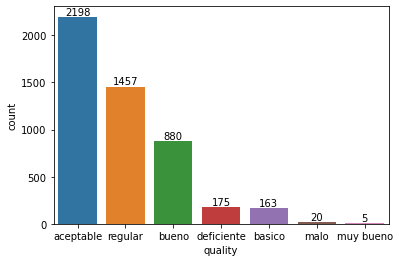

In [361]:
df.quality.replace((0,1,2,3,4,5,6,7,8,9,10), ('destacado',
                                              'deficiente',
                                              'insuficiente',
                                              'malo',
                                              'basico',
                                              'regular',
                                              'aceptable',
                                              'bueno',
                                              'deficiente',
                                              'muy bueno',
                                              'excelente'), inplace = True)

graficar_histograma_clases(['quality'], df)

In [362]:
# Encode classes as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# One hot encode integer labels
one_hot_Y = np_utils.to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(X,                                                   
                                                    one_hot_Y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [363]:
X = pd.DataFrame(results.transform(X), 
                 index = X.index, 
                 columns = X_train.columns[results.get_support()])

X_train_fr = pd.DataFrame(results.transform(X_train), 
                          index = X_train.index, 
                          columns = X_train.columns[results.get_support()])

X_test_fr = pd.DataFrame(results.transform(X_test), 
                         index = X_test.index, 
                         columns = X_test.columns[results.get_support()])


X_train = X_train_fr
X_test = X_test_fr

print('X:', X.shape)
print('X:', Y.shape)
print('X_train:', X_train.shape, X_train_fr.shape)
print('X_test: ', X_test.shape, X_test_fr.shape)
print('y_train:', y_train.shape)
print('y_test: ', y_test.shape)

X: (4898, 7)
X: (4898,)
X_train: (3918, 7) (3918, 7)
X_test:  (980, 7) (980, 7)
y_train: (3918, 7)
y_test:  (980, 7)


In [364]:
X_columns_lst = list(X.columns)
Y_columns_lst = 'quality'
Y_classes_lst = df['quality'].unique()

print(X_columns_lst)
print(Y_columns_lst)
print(Y_classes_lst)

['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol']
quality
['aceptable' 'regular' 'bueno' 'deficiente' 'basico' 'malo' 'muy bueno']


In [365]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [366]:
import warnings
warnings.filterwarnings('ignore')

def graficar_histograma_cuantitativas(col_numericas, df):
    
    for col in col_numericas:
                
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        sns.boxplot(df[col], ax=ax_box)
        sns.distplot(df[col], ax=ax_hist)
        ax_box.set(xlabel='')  

columns = list(list(X_train.columns))        
#graficar_histograma_cuantitativas(columns, X_train)

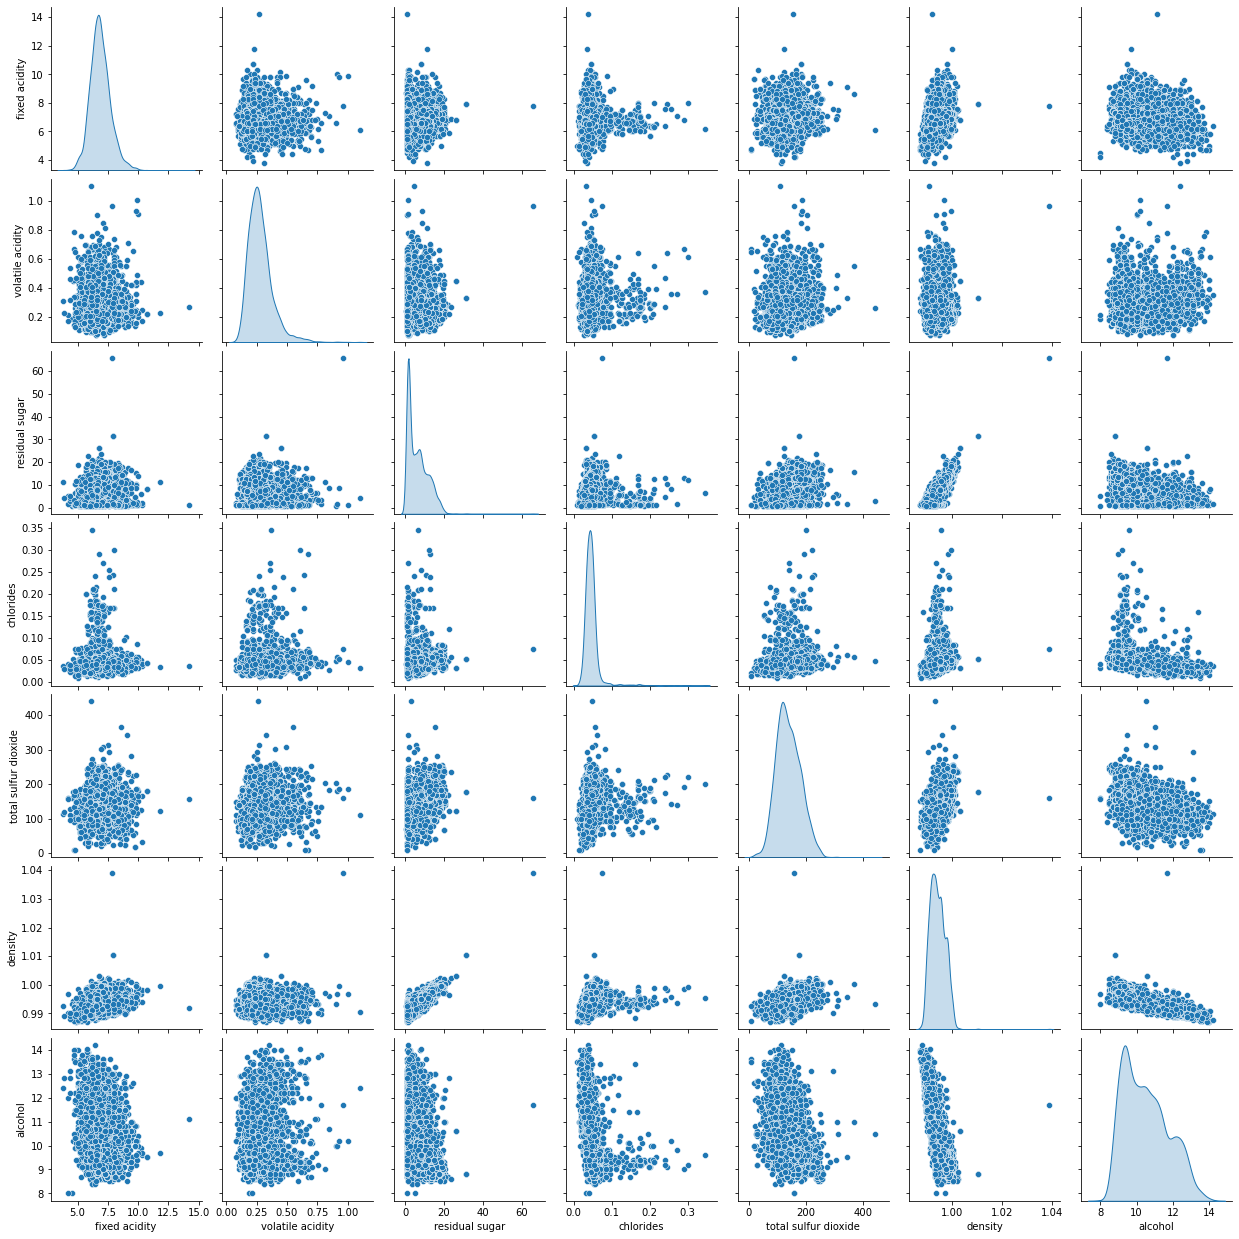

In [367]:
sns.pairplot(df[['fixed acidity',
                 'volatile acidity',
                 'residual sugar',                 
                 'chlorides',
                 'total sulfur dioxide',
                 'density',
                 'alcohol',
                 'quality']], diag_kind="kde")

### Normalización de datos

In [368]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3918.0,6.853714,0.825378,3.80000,6.3000,6.800000,7.3000,11.8000
volatile acidity,3918.0,0.278401,0.100316,0.08000,0.2100,0.260000,0.3200,1.1000
residual sugar,3918.0,6.366807,4.994107,0.60000,1.7000,5.200000,9.8000,31.6000
chlorides,3918.0,0.045862,0.022008,0.00900,0.0360,0.043000,0.0500,0.3460
total sulfur dioxide,3918.0,138.448698,42.228313,9.00000,109.0000,134.000000,167.0000,440.0000
density,3918.0,0.994005,0.002932,0.98711,0.9917,0.993715,0.9961,1.0103
alcohol,3918.0,10.518579,1.233287,8.00000,9.5000,10.400000,11.4000,14.2000


In [369]:
# Escalar los datos de entrada de entrenamiento y prueba
from sklearn import preprocessing

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

print(X_train.shape)
print(X_test.shape)

(3918, 7)
(980, 7)


## Contrucción del modelo neuronal - clasificación

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

Hay una sola capa oculta con 4 entradas (las cuatro columnas de datos de entrada) conectadas a la capa de salida que contiene tres neuronas.

Usamos softmax como la función de activación de salida en la capa de salida porque significa que todas las neuronas de salida serán iguales a 1, lo que nos permite interpretar la salida del modelo como probabilidades para cada clase. Es importante entender esta elección porque la red no comprende lo que está modelando. Estamos eligiendo funciones de activación y funciones de pérdida en función de lo que nosotros, como humanos, queremos que genere el modelo.

La función de pérdida para el entrenamiento, la entropía cruzada categórica, es solo una forma elegante de decir que el modelo se entrenará para generar un solo resultado alto (la clase).

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.
El siguiente ejemplo usa *accuracy* (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [370]:
len(X_train[0])

7

In [371]:
# Generar un archivo pdf con un gráfico de la red construida
#!pip install ann_visualizer
# dependencias (pip install graphviz, conda install -c conda-forge python-graphviz)
#https://github.com/RedaOps/ann-visualizer

from ann_visualizer.visualize import ann_viz;
model_Red = get_model()
ann_viz(model_Red, title="Artificial Neural network - quality");

In [372]:
from keras.layers import Dense
from keras.models import Sequential

def get_model():
    # Create model
    model = Sequential()
    model.add(Dense(10,  input_shape=[len(X_train[0])]   ))
    #model.add(Dense(500, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

### Validación cruzada para validar rendimiento del modelo

In [373]:
from sklearn.model_selection import KFold

# Create the k-folds cross-validator
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

In [374]:
def validacion_cruzada(num_epochs = 20, 
                       X = X,
                       train_scores = [],
                       test_scores = []):
        
   
    fold_index = 1
    X = X.to_numpy(np.float32) if str(type(X)) != 'numpy.ndarray' else X  


    # Train model for each fold
    for train, test in kfold.split(X, one_hot_Y):

        # Create model
        model = get_model()

        # Fit the model
        history = model.fit(
            X[train],
            one_hot_Y[train],
            validation_data=(X[test], one_hot_Y[test]),
            epochs=num_epochs,
            batch_size=5,
            verbose=0
        )

         # Preserve the history and print out some basic stats
        train_scores.append(history.history['accuracy'])
        test_scores.append(history.history['val_accuracy'])
        print("Fold %d:" % fold_index)
        print("Training accuracy: %.2f%%" % (history.history['accuracy'][-1]*100))
        print("Testing accuracy: %.2f%%" % (history.history['val_accuracy'][-1]*100))
        fold_index += 1
        
    return train_scores, test_scores

train_scores, test_scores = validacion_cruzada(num_epochs = 20, X=X)        
print(type(train_scores))
print(type(test_scores))

Fold 1:
Training accuracy: 46.85%
Testing accuracy: 53.06%
Fold 2:
Training accuracy: 49.46%
Testing accuracy: 44.69%
Fold 3:
Training accuracy: 46.48%
Testing accuracy: 56.53%
Fold 4:
Training accuracy: 46.46%
Testing accuracy: 47.35%
Fold 5:
Training accuracy: 45.92%
Testing accuracy: 49.39%
Fold 6:
Training accuracy: 47.44%
Testing accuracy: 40.82%
Fold 7:
Training accuracy: 47.78%
Testing accuracy: 44.08%
Fold 8:
Training accuracy: 46.44%
Testing accuracy: 48.37%
Fold 9:
Training accuracy: 47.54%
Testing accuracy: 52.35%
Fold 10:
Training accuracy: 48.04%
Testing accuracy: 50.31%
<class 'list'>
<class 'list'>


In [375]:
print(len(train_scores))

10


In [376]:
print(len(test_scores))

10


Obtenemos un promedio de los resultados obtenidos en el paso anterior

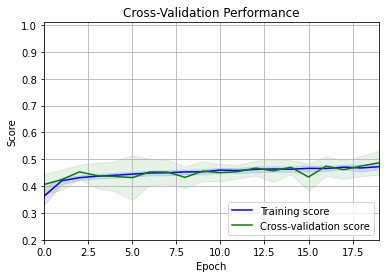

In [377]:
import matplotlib.pyplot as plt

def graficar_validacion_cruzada(train_scores, test_scores, num_epochs):

    # Set up the plot
    plt.figure()
    plt.title('Cross-Validation Performance')
    plt.ylim(0.2, 1.01)
    plt.xlim(0, num_epochs-1)
    plt.xlabel("Epoch")
    plt.ylabel("Score")
    plt.grid()
    
    # Calculate mean and distribution of training history
    train_scores_mean = np.mean(train_scores, axis=0)
    train_scores_std = np.std(train_scores, axis=0)
    test_scores_mean = np.mean(test_scores, axis=0)
    test_scores_std = np.std(test_scores, axis=0)

    # Plot the average scores
    plt.plot(
        train_scores_mean,
        '-',
        color="b",
        label="Training score"
    )
    plt.plot(
        test_scores_mean,
        '-',
        color="g",
        label="Cross-validation score"
    )

    # Plot a shaded area to represent the score distribution
    epochs = list(range(num_epochs))
    plt.fill_between(
        epochs,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="b"
    )
    plt.fill_between(
        epochs,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g"
    )

    plt.legend(loc="lower right")
    plt.show()
    
graficar_validacion_cruzada(train_scores, test_scores, num_epochs = 20)    

La línea azul y el sombreado representan la media y la desviación estándar del rendimiento del modelo sobre los datos de entrenamiento, mientras que la línea verde y el sombreado representan la media y la desviación estándar de su rendimiento sobre los datos de validación "no vistos".

### Mejorar rendimiento del modelo

El grafico anterior muestra una ligera mejora del modelo en cada iteración, lo cual nos indica que si adicionamos mas cliclos nuestro modelo prodrá mejorar. 

Aumento de EPOCH = 60

In [378]:
train_scores_100, test_scores_100 = validacion_cruzada(num_epochs = 100, 
                                                       X=X,
                                                       train_scores = [],
                                                       test_scores = []) 

Fold 1:
Training accuracy: 51.00%
Testing accuracy: 50.20%
Fold 2:
Training accuracy: 48.59%
Testing accuracy: 47.76%
Fold 3:
Training accuracy: 49.89%
Testing accuracy: 49.39%
Fold 4:
Training accuracy: 49.52%
Testing accuracy: 50.00%
Fold 5:
Training accuracy: 49.98%
Testing accuracy: 51.02%
Fold 6:
Training accuracy: 51.02%
Testing accuracy: 47.76%
Fold 7:
Training accuracy: 49.41%
Testing accuracy: 56.73%
Fold 8:
Training accuracy: 50.00%
Testing accuracy: 52.04%
Fold 9:
Training accuracy: 51.30%
Testing accuracy: 49.28%
Fold 10:
Training accuracy: 50.33%
Testing accuracy: 49.69%


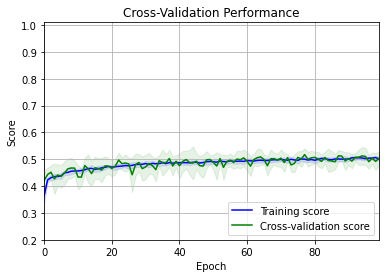

In [379]:
graficar_validacion_cruzada(train_scores_100, test_scores_100, num_epochs=100)  

1. Aumente aún más el número de épocas y evalúe el rendimiento.
2. Modifique otras características del modelo (capas, número de neuronas ocultas, etc.) para ver cómo cambia el rendimiento.
3. Aumentar o disminuir el número de pliegues. Un mayor número de pliegues da como resultado conjuntos de datos de validación más pequeños que probablemente aumentarán la distribución de la precisión.

## Random Fores Classifier - clasificación

In [380]:
X = df.drop(labels=['quality', ], axis=1)
Y = df['quality']


X_train, X_test, y_train, y_test = train_test_split(X,                                                   
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [381]:
X_columns_lst = list(X_train.columns)
Y_columns_lst = 'quality'
Y_classes_lst = y_train.unique()

print(X_columns_lst)
print(Y_columns_lst)
print(Y_classes_lst)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
quality
['regular' 'aceptable' 'bueno' 'basico' 'deficiente' 'malo' 'muy bueno']


In [382]:
# Modelo alternativo de RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_RF = RandomForestClassifier(n_estimators=100, random_state=0)
model_RF.fit(X_train, y_train)
preds_test = model_RF.predict(X_test)

print('ACC RF : %.3f' % accuracy_score(y_test, preds_test))

ACC RF : 0.652


### Evaluar efectividad y rendimiento del modelo

No handles with labels found to put in legend.


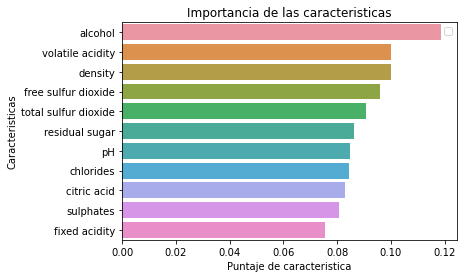

In [383]:
%matplotlib inline

feature_imp = pd.Series(model_RF.feature_importances_, index = X_columns_lst).sort_values(ascending=False)
feature_imp

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Puntaje de caracteristica')
plt.ylabel('Caracteristicas')
plt.title("Importancia de las caracteristicas")
plt.legend()
plt.show()

Segun la grafica anterior todas las variables aportan a la predicción por lo cual no merece la pena eliminar alguna para mejorar el rendimiento del modelo.

<b>Matriz de confusión:</b> 

<p>Esta herramienta nos muestra un resumen del rendimiento del algoritmo de
clasificación, tambien podemos visualizar algunos errores. Por ultimo
muestra un resumen tabular con las predicciones correctas e incorrectas de cada categoría:

-Verdaderos positivos (TP): los verdaderos positivos ocurren cuando predecimos que una observación pertenece a una determinada clase y la observación realmente pertenece a esa clase.
    
-Verdaderos negativos (TN): los verdaderos negativos ocurren cuando predecimos que una observación no pertenece a una determinada clase y la observación en realidad no pertenece a esa clase.

-Falsos positivos (FP): los falsos positivos ocurren cuando predecimos que una observación pertenece a una determinada clase, pero la observación en realidad no pertenece a esa clase. Este tipo de error se denomina error de tipo I.

-Falsos negativos (FN): los falsos negativos ocurren cuando predecimos que una observación no pertenece a una determinada clase, pero la observación en realidad pertenece a esa clase. Este es un error muy grave y se denomina error de Tipo II.  
</p>
<b>NOTA:</b> 
<ol>   
    <li>Escenario ideal: 0 falsos positivos y 0 falsos negativos, tambien que la diagonal de la 
    matriz tenga valores maximos y el resto ceros.</li>
    <li>En la diagonal principal se encuentran las evaluaciones correctas (TP).</li>
    <li>TN, son el resto de valores de la clase diferentes al de la intersección en la diagonal.</li>
    <li>FP, Para identificarlos nos ubicamos en el eje x de las predicciones, seleccionamos la clase
       a evaluar y observamos todos los valores ubicados en el eje y diferentes al de la diagonal.</li>
    <li>FN, se efectua la misma operación del punto 4 pero cambiando los ejes.</li>
    <li>la suma de elementos de cada fila, es el total de elementos asociados al conjunto de datos
       de prueba de cada clase.</li>
    <li>4 clases = matris 4 x 4.</li>
</ol>

<div>
    <div style="position:relative;width:50%px;height:250px;" align="left">
        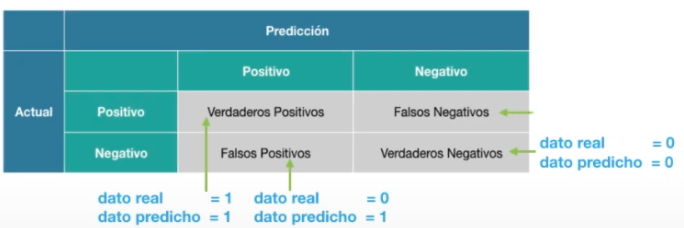
    </div>
    <div style="position:relative;width:50%;height:250px;" align="rigth">
        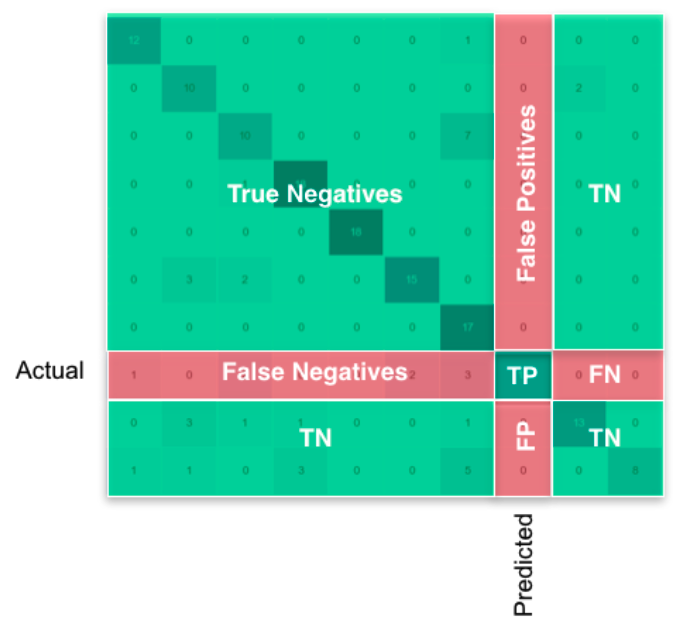
    </div>
</div>

In [384]:
cnf_matrix = confusion_matrix(y_test, 
                              preds_test,
                              labels = ['aceptable',
                                        'regular', 
                                        'bueno', 
                                        'deficiente', 
                                        'basico'
                                        'malo',
                                        'muy bueno'])


print(cnf_matrix)

[[338  50  21   0   0   0]
 [100 189   6   0   0   0]
 [ 78   6  97   2   0   0]
 [ 11   0  14   8   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


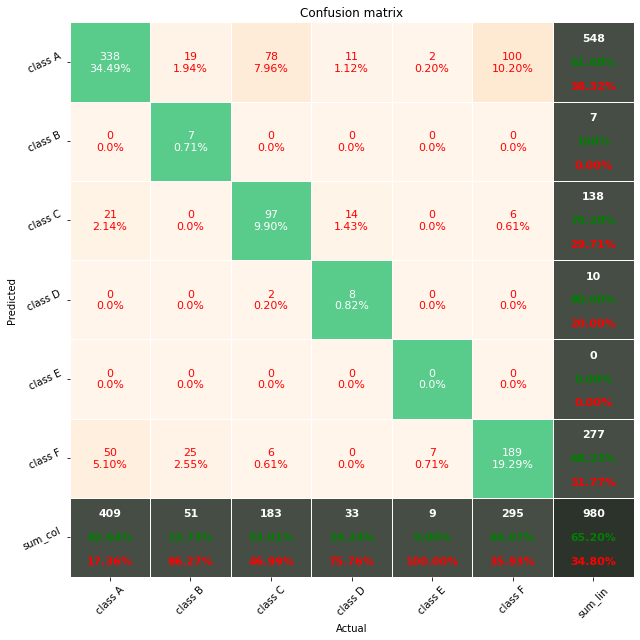

In [385]:
import numpy as np
from pretty_confusion_matrix import pp_matrix_from_data


pp_matrix_from_data(y_test, preds_test)

In [386]:
print(metrics.classification_report(y_test, preds_test, digits = 2))
print('ACC RF : %.3f' % accuracy_score(y_test, preds_test))

              precision    recall  f1-score   support

   aceptable       0.62      0.83      0.71       409
      basico       1.00      0.14      0.24        51
       bueno       0.70      0.53      0.60       183
  deficiente       0.80      0.24      0.37        33
        malo       0.00      0.00      0.00         9
     regular       0.68      0.64      0.66       295

    accuracy                           0.65       980
   macro avg       0.63      0.40      0.43       980
weighted avg       0.67      0.65      0.63       980

ACC RF : 0.652


In [387]:
print('exactitud',     round(accuracy_score(y_test, preds_test),2))
print('presición',     round(precision_score(y_test, preds_test, average='weighted'),2))
print('sensibilidad',  round(recall_score(y_test, preds_test, average='weighted'),2))
print('f1',            round(f1_score(y_test, preds_test, average='weighted'),2))

exactitud 0.65
presición 0.67
sensibilidad 0.65
f1 0.63


## Validación superpuesta de modelos

Además, utilizaremos una validación cruzada estratificada de 10 veces (k-fold) para estimar la precisión del modelo y compararlo CART y ID3, aunque tengamos un número de instancias considerables, vamos a probar los modelos mediante esta validación y asi comparar los resultados obtenidos en el Split 80% - 20%

<b>Validación cruzada estratificada de 10 veces (k-fold)</b> 

In [388]:
from statistics import mean

cv_results_red_20_epoch = []
cv_results_red_100_epoch = []

for x in train_scores:
    cv_results_red_20_epoch.append(round(mean(x), 2))

for x in train_scores_100:
    cv_results_red_100_epoch.append(round(mean(x), 2))    

    
cv_results_red_20_epoch = numpy.array(cv_results_red_20_epoch)
cv_results_red_100_epoch = numpy.array(cv_results_red_100_epoch)

print(cv_results_red_20_epoch)
print(cv_results_red_100_epoch)

[0.45 0.46 0.44 0.44 0.45 0.45 0.45 0.45 0.46 0.45]
[0.49 0.48 0.48 0.48 0.49 0.49 0.48 0.48 0.5  0.48]


RFC: 0.680700 (0.012539)
Red_20_Epoch: 0.450000 (0.006325)
Red_100_Epoch: 0.485000 (0.006708)


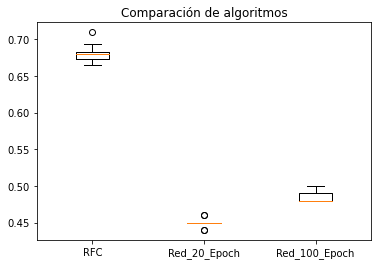

In [389]:
# evaluamos cada modelo por turnos
results = []
names = ['RFC', 'Red_20_Epoch', 'Red_100_Epoch']

model = RandomForestClassifier(n_estimators=100, random_state=0)
kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

results.append(cv_results)
results.append(cv_results_red_20_epoch)
results.append(cv_results_red_100_epoch)

print('%s: %f (%f)' % (names[0], cv_results.mean(), cv_results.std()))
print('%s: %f (%f)' % (names[1], cv_results_red_20_epoch.mean(), cv_results_red_20_epoch.std()))
print('%s: %f (%f)' % (names[2], cv_results_red_100_epoch.mean(), cv_results_red_100_epoch.std()))
    
# Comparación de algoritmo
pyplot.boxplot(results, labels = names)
pyplot.title('Comparación de algoritmos')
pyplot.show()

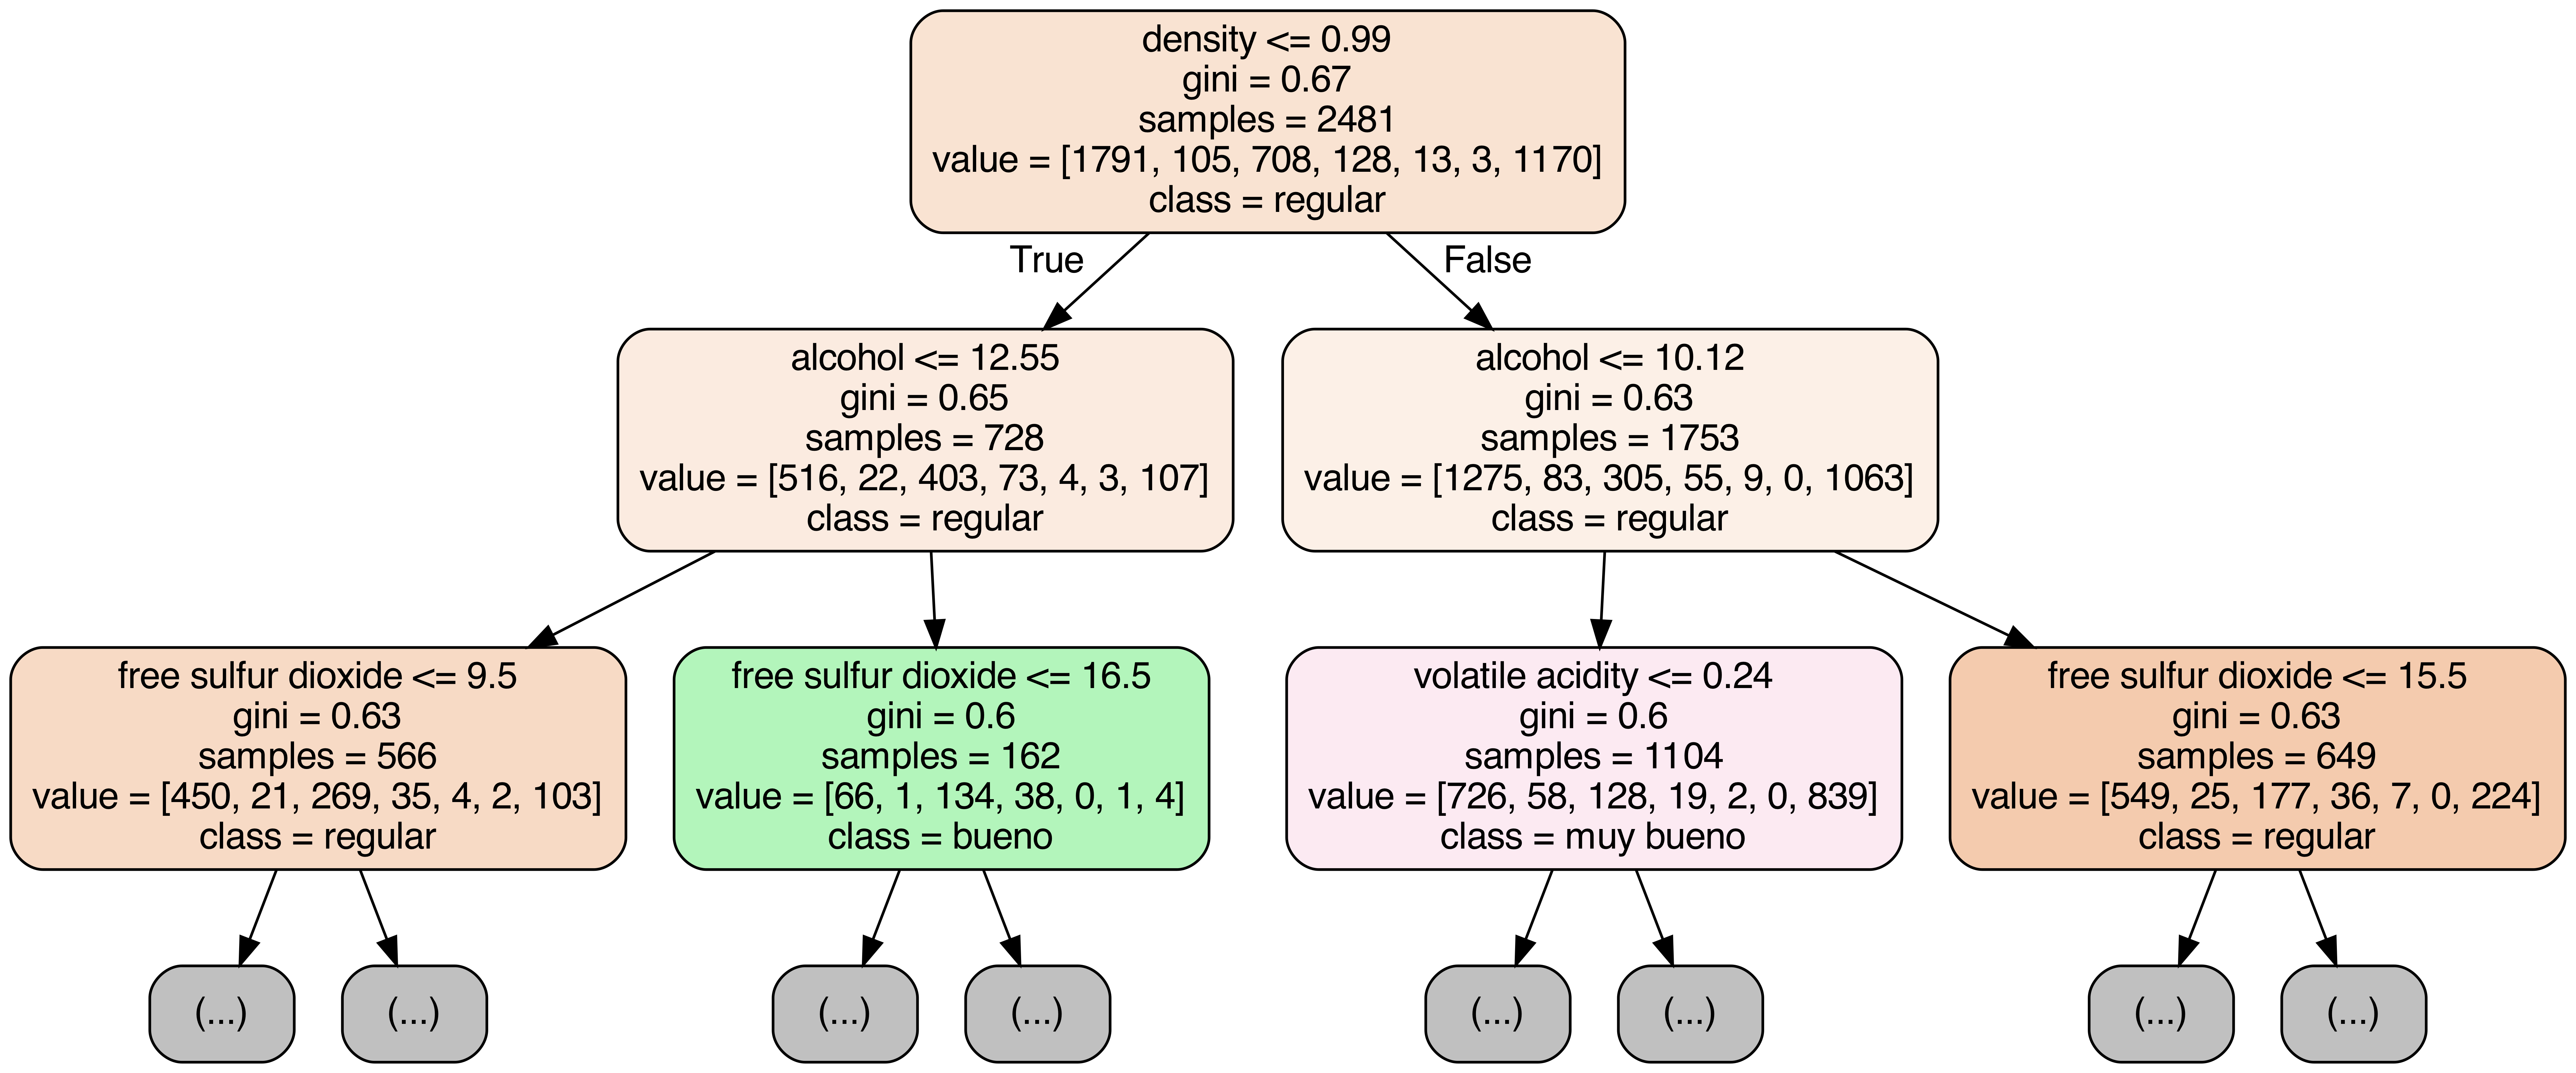

In [395]:
from sklearn.tree import export_graphviz

# Extract single tree
estimator = model_RF.estimators_[5]

# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = X_columns_lst,
                class_names = Y_classes_lst,
                rounded = True,
                proportion = False, 
                precision = 2, 
                filled = True,
                max_depth = 2
        
               )

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Algunas Referencias Bibliograficas

* https://www.tensorflow.org/tutorials/keras/classification?hl=es-419
* https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
* https://github.com/jagjeet555/Kaggle/blob/main/Untitled3.ipynb
* https://www.youtube.com/watch?v=yYvSscuM8so
* https://www.bmc.com/blogs/keras-neural-network-classification/
* https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
* https://www.youtube.com/watch?v=oOSXQP7C7ck&t=185s    
    
